# INFO 3402 – Class 16: Missing data exercise

[Brian C. Keegan, Ph.D.](http://brianckeegan.com/)  
[Assistant Professor, Department of Information Science](https://www.colorado.edu/cmci/people/information-science/brian-c-keegan)  
University of Colorado Boulder  

Copyright and distributed under an [MIT License](https://opensource.org/licenses/MIT)  

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

We'll use a dataset I partially cleaned from the Office of Personnel Management's [Federal Employees Viewpoint Survey](https://www.opm.gov/fevs/public-data-file), which has been distributed annually since 2010. If you're interested in how to clean up the data from the raw files, look at the Appendix notebook I uploaded.

The annual surveys ask approximately 80 questions about job satisfaction, organizational performance, manager competence, *etc*. as well as demographic variables about each respondent. Each annual survey has between 263,475 and 687,687 responses, which totals several hundred megabytes. Rather than sharing these individual survey responses, I extracted a handful of fields. The values of the survey items are on a Likert scale where 1 is "low" and 5 is "high".

* **count**: the number of responses in this category. Integer.
* **important work** (Q13): "The work I do is important". 1 = "Strongly Disagree" to 5 = "Strongly Agree".
* **work quality** (Q28): "How would you rate the overall quality of work done by your work unit?". 1 = "Very Poor" to 5 = "Very Good".
* **successful mission** (Q39): "My agency is successful at accomplishing its mission." 1 = "Strongly Disagree" to 5 = "Strongly Agree".
* **like work** (Q5): "I like the kind of work I do." 1 = "Strongly Disagree" to 5 = "Strongly Agree".
* **job satisfaction** (Q69): "Considering everything, how satisfied are you with your job?" 1 = "Very Dissatisfied" to 5 = "Very Satisfied"
* **org satisfaction** (Q71): "Considering everything, how satisfied are you with your organization?" 1 = "Very Dissatisfied" to 5 = "Very Satisfied"

I broke these responses down by a combination of demographic and other covariates.

* **year**: year of the survey. Values range from 2010 through 2018.
* **agency**: the parent federal agency/department.
* **subagency**: the child federal agency/department.
* **supervisor**: whether the employee is a supervisor or not.
* **sex**: male or female.
* **minority**: minority or not.
* **leaving**: "Are you considering leaving your organization within the next year, and if so, why?" Responses include "No", "Yes, to take another job within the federal government", "Yes, to take another job outside the federal government", and "Yes, other"

Read in the data.

In [2]:
df = pd.read_csv('fevs_summary_2010-2018.csv',encoding='utf8')
print("There are {0:,} rows.".format(len(df)))
df.tail(10)

There are 49,400 rows.


,year,agency,subagency,supervisor,sex,minority,leaving,count,important work,work quality,successful mission,like work,job satisfaction,org satisfaction
49390,2018,Consumer Product Safety Commission,"Consumer Product Safety Commission, All Other",Supervisor/Manager/Senior Leader,Male,Non-minority,"Yes, within",3.0,4.666667,4.333333,4.000000,4.000000,3.333333,3.333333
49391,2018,Consumer Product Safety Commission,"Consumer Product Safety Commission, All Other",Supervisor/Manager/Senior Leader,Male,Non-minority,"Yes, outside",1.0,5.000000,5.000000,4.000000,5.000000,2.000000,5.000000
49392,2018,Consumer Product Safety Commission,"Consumer Product Safety Commission, All Other",Non-Supervisor/Team Leader,Female,Non-minority,No,36.0,4.388889,4.611111,4.058824,4.333333,4.083333,3.942857
49393,2018,Consumer Product Safety Commission,"Consumer Product Safety Commission, All Other",Non-Supervisor/Team Leader,Female,Non-minority,Other,4.0,4.250000,4.000000,3.000000,4.250000,3.000000,3.000000
49394,2018,Consumer Product Safety Commission,"Consumer Product Safety Commission, All Other",Non-Supervisor/Team Leader,Female,Non-minority,"Yes, within",17.0,3.823529,4.187500,4.000000,3.529412,2.875000,2.764706
49395,2018,Consumer Product Safety Commission,"Consumer Product Safety Commission, All Other",Non-Supervisor/Team Leader,Female,Non-minority,"Yes, outside",5.0,4.400000,4.400000,4.000000,3.800000,3.200000,3.200000
49396,2018,NaN,NaN,Supervisor/Manager/Senior Leader,Female,Non-minority,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49397,2018,NaN,NaN,Supervisor/Manager/Senior Leader,Female,Non-minority,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49398,2018,NaN,NaN,Supervisor/Manager/Senior Leader,Female,Non-minority,"Yes, within",NaN,NaN,NaN,NaN,NaN,NaN,NaN
49399,2018,NaN,NaN,Supervisor/Manager/Senior Leader,Female,Non-minority,"Yes, outside",NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Explore missing data

Count the values for "supervisor", "sex", "minority", "leaving", and "agency" to confirm.

In [3]:
df['supervisor'].value_counts()

Non-Supervisor/Team Leader          26886
Supervisor/Manager/Senior Leader    22514
Name: supervisor, dtype: int64

In [5]:
df['sex'].value_counts()

Male      25388
Female    24012
Name: sex, dtype: int64

In [6]:
df['minority'].value_counts()

Non-minority    26237
Minority        23163
Name: minority, dtype: int64

In [7]:
df['leaving'].value_counts()

No              13340
Yes, within     12875
Other           12649
Yes, outside    10536
Name: leaving, dtype: int64

In [8]:
df['agency'].value_counts()

Department of the Army                                          4087
Department of the Navy                                          3762
Department of Agriculture                                       3267
Department of the Air Force                                     2997
OSD, Joint Staff, Defense Agencies, and DoD Field Activities    2827
Department of Justice                                           2792
Department of Homeland Security                                 2614
Department of Health and Human Services                         2569
Department of the Interior                                      2300
Environmental Protection Agency                                 2120
Department of the Treasury                                      1953
National Aeronautics and Space Administration                   1948
Department of Labor                                             1613
Department of Commerce                                          1433
Department of Energy              

Sort the values to find the demographic permutation with the greatest number of responses.

In [10]:
df.sort_values('count',ascending=False).head()

,year,agency,subagency,supervisor,sex,minority,leaving,count,important work,work quality,successful mission,like work,job satisfaction,org satisfaction
15938,2012,NaN,"All Other Agencies, All Other",Non-Supervisor/Team Leader,Female,Non-minority,No,20680.0,4.440164,4.361844,4.033434,4.228345,3.952476,3.783337
15922,2012,NaN,"All Other Agencies, All Other",Non-Supervisor/Team Leader,Female,Minority,No,16316.0,4.552991,4.265995,3.989780,4.262505,3.953207,3.806223
15930,2012,NaN,"All Other Agencies, All Other",Non-Supervisor/Team Leader,Male,Non-minority,No,16200.0,4.385717,4.364518,4.048202,4.228596,4.000558,3.796954
29643,2015,NaN,"All Other Agencies, All Other",Non-Supervisor/Team Leader,Male,Non-minority,No,15781.0,4.379344,4.413019,4.037546,4.282791,4.020886,3.813136
29651,2015,NaN,"All Other Agencies, All Other",Non-Supervisor/Team Leader,Female,Non-minority,No,13856.0,4.398839,4.433435,4.056993,4.278976,3.989840,3.793153


Use `pivot_table` to count the number of responses by year.

In [14]:
pd.pivot_table(df,index='year',values='count',aggfunc='sum')

,count
year,
2010,241999.0
2011,237851.0
2012,613739.0
2013,323023.0
2014,342127.0
2015,368572.0
2016,361078.0
2017,392469.0
2018,508082.0


Even though the demographics are balanced, it does not mean the survey responses are. Make a `nonan_df` using `dropna` to remove missing rows of data. How many rows of data remain after dropping the missing values under "count"?

In [43]:
nonan_df = df.dropna(subset=['count'])

len_before = len(df)
len_after = len(nonan_df)
print("There were {0:,} rows before and {1:,} rows after.".format(len_before,len_after))

There were 49,400 rows before and 45,299 rows after.


Use boolean indexing and `pandas`'s [`.isnull()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html) method to make a new DataFrame called `missing_df` containing only the rows missing values.

In [44]:
missing_df = df[df['count'].isnull()]
missing_df.head()

,year,agency,subagency,supervisor,sex,minority,leaving,count,important work,work quality,successful mission,like work,job satisfaction,org satisfaction
807,2010,NaN,NaN,Non-Supervisor/Team Leader,Male,Minority,"Yes, outside",NaN,NaN,NaN,NaN,NaN,NaN,NaN
819,2010,NaN,NaN,Supervisor/Manager/Senior Leader,Female,Minority,"Yes, outside",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1448,2010,NaN,NaN,Supervisor/Manager/Senior Leader,Male,Minority,"Yes, outside",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1452,2010,NaN,NaN,Non-Supervisor/Team Leader,Female,Minority,"Yes, outside",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1456,2010,NaN,NaN,Supervisor/Manager/Senior Leader,Female,Minority,"Yes, outside",NaN,NaN,NaN,NaN,NaN,NaN,NaN


Which agencies or subagencies have the most missing values? Which have the fewest?

In [45]:
pd.pivot_table(data = missing_df, columns = ['agency'], values = )

agency
count
important work
job satisfaction
like work
org satisfaction
successful mission
work quality
year


Are male or female demographics more likely to have missing data?

## Make a pivot table
Make a pivot table with "year" as indices, "agency" as columns, and the average "org satisfaction" as values.

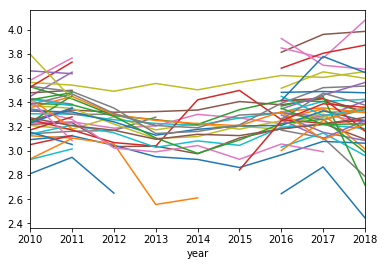

In [19]:
pt = pd.pivot_table(df,index='year',columns='agency',values='org satisfaction',aggfunc='mean')
pt.plot(legend=False)

Average the pivot table by year. Which year had the highest satisfaction?

In [26]:
pt.mean(axis=1).sort_values()

year
2013    3.136607
2014    3.149907
2012    3.191175
2015    3.192678
2010    3.311874
2018    3.321423
2011    3.321664
2016    3.322376
2017    3.356770
dtype: float64

Average the pivot table by agency. Which agency has the highest satisfaction?

In [25]:
pt.mean(axis=0).sort_values(ascending=False)

agency
Federal Trade Commission                                        3.809565
Federal Energy Regulatory Commission                            3.749030
National Science Foundation                                     3.724791
Pension Benefit Guaranty Corporation                            3.599589
National Aeronautics and Space Administration                   3.568272
Office of Management and Budget                                 3.563309
Consumer Product Safety Commission                              3.549033
Nuclear Regulatory Commission                                   3.534161
Corporation for National and Community Service                  3.472244
Securities and Exchange Commission                              3.409970
National Credit Union Administration                            3.406989
Railroad Retirement Board                                       3.377386
Court Services and Offender Supervision Agency                  3.373928
General Services Administration             

## Make exploratory pointplots
Use `seaborn` to make a [pointplot](https://seaborn.pydata.org/generated/seaborn.pointplot.html) of job satisfaction by year.

/Users/briankeegan/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


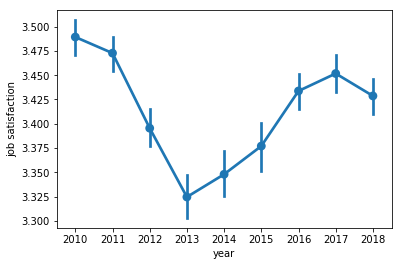

In [28]:
sb.pointplot(x='year',y='job satisfaction',data=df)

Update the pointplot to include a hue by supervisor status. What are interesting trends or differences?

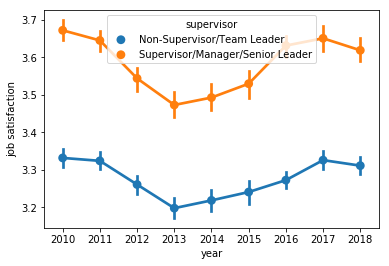

In [29]:
sb.pointplot(x='year',y='job satisfaction',hue='supervisor',data=df)

Update the catplot to include column facets by sex. What are interesting trends or differences?

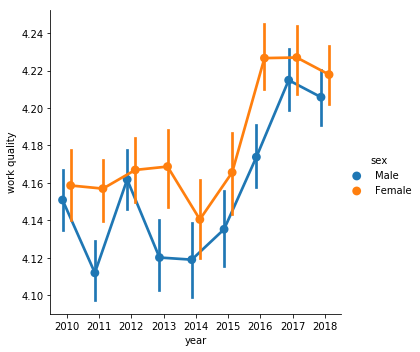

In [34]:
sb.catplot(x='year',y='work quality',hue='sex',data=df,kind='point',dodge=.25)

Make some other exploratory pointplots for this data.

In [40]:
df['agency'].value_counts()

Department of the Army                                          4087
Department of the Navy                                          3762
Department of Agriculture                                       3267
Department of the Air Force                                     2997
OSD, Joint Staff, Defense Agencies, and DoD Field Activities    2827
Department of Justice                                           2792
Department of Homeland Security                                 2614
Department of Health and Human Services                         2569
Department of the Interior                                      2300
Environmental Protection Agency                                 2120
Department of the Treasury                                      1953
National Aeronautics and Space Administration                   1948
Department of Labor                                             1613
Department of Commerce                                          1433
Department of Energy              

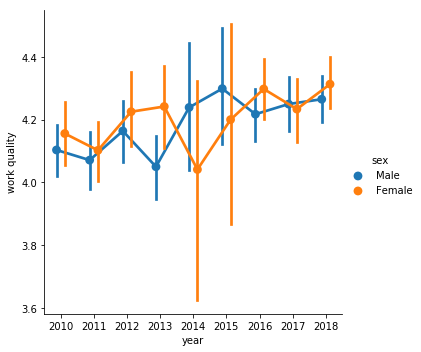

In [42]:
sb.catplot(x='year',y='work quality',hue='sex',data=df.query("agency == 'Department of Energy'"),
           kind='point',dodge=.25)